[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/Using_Matplotlib_Effectively.ipynb)



1.   Learn the basic matplotlib terminology, specifically what is a Figure and an Axes
2.   Always use the object-oriented interface. Get in the habit of using it from the start of the analysis
3.   Start the visualization with basic pandas plotting
4.   Use seaborn for the more complex statistical visualiaztion
5.   Use matplotlib to customize the pandas or seaborn visualiazation



In [30]:
#@title
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving matplotlib-pbpython-example.png to matplotlib-pbpython-example.png
User uploaded file "matplotlib-pbpython-example.png" with length 173351 bytes


In [0]:
from IPython.display import Image

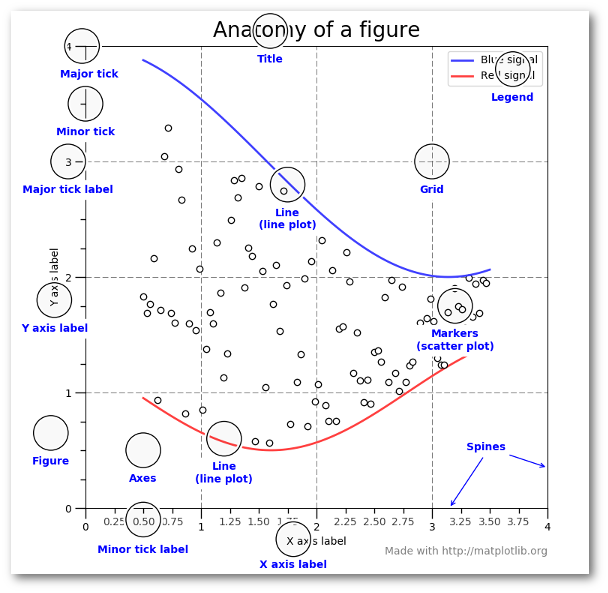

In [4]:
Image('matplotlib-anatomy.png')

Most of the terms are straightforward but the main thing to remember is that the **Figure** is the final image that may contain 1 or more axes. The **Axes** represent an individual plot.

# Getting Started

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
    100% |████████████████████████████████| 112kB 2.6MB/s 


In [4]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()          

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [0]:
top_10 = (df.groupby('name')['ext price','quantity'].agg({'ext price': 'sum','quantity':'count'})
         .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name':'Name','ext price':'Sales','quantity':'Purchases'},inplace=True)

In [7]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


matplotlib has many different styles avaiable for redering plots

In [8]:
plt.style.available

['seaborn',
 'seaborn-whitegrid',
 'seaborn-talk',
 'dark_background',
 'bmh',
 'seaborn-ticks',
 'seaborn-dark-palette',
 'seaborn-pastel',
 'seaborn-bright',
 '_classic_test',
 'seaborn-white',
 'seaborn-muted',
 'fivethirtyeight',
 'seaborn-colorblind',
 'classic',
 'seaborn-paper',
 'Solarize_Light2',
 'seaborn-dark',
 'seaborn-notebook',
 'seaborn-poster',
 'ggplot',
 'seaborn-darkgrid',
 'seaborn-deep',
 'fast',
 'grayscale']

In [0]:
plt.style.use('ggplot')

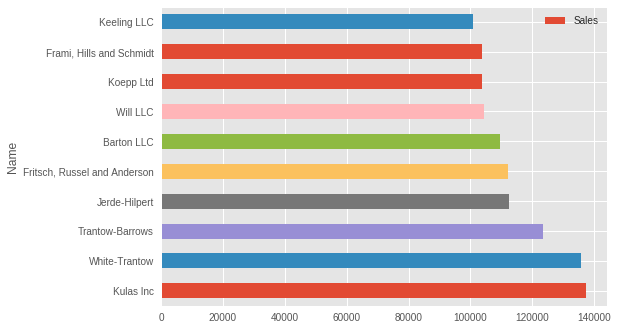

In [10]:
top_10.plot(kind='barh',y="Sales",x="Name")

The reason using pandas plotting is that it is a quick and easy way to prototype visualiaztion.

# Customizing the Plot

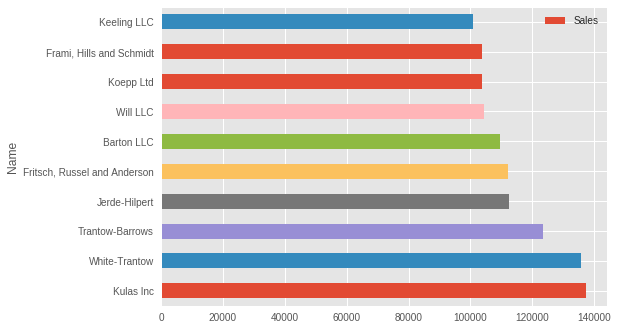

In [13]:
fig, ax = plt.subplots()
top_10.plot(kind='barh',y="Sales",x="Name",ax=ax)

Text(0,0.5,'Customer')

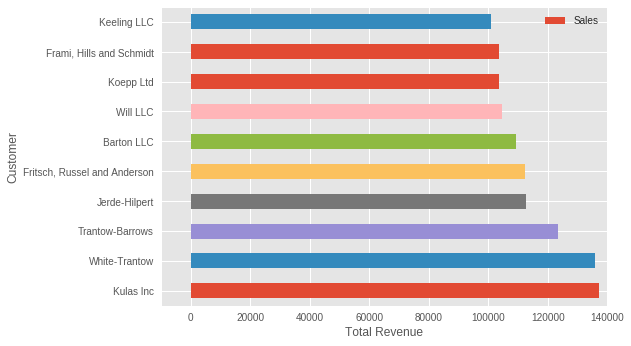

In [15]:
fig, ax = plt.subplots()
top_10.plot(kind='barh',y="Sales",x="Name",ax=ax)
ax.set_xlim([-10000,140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer')

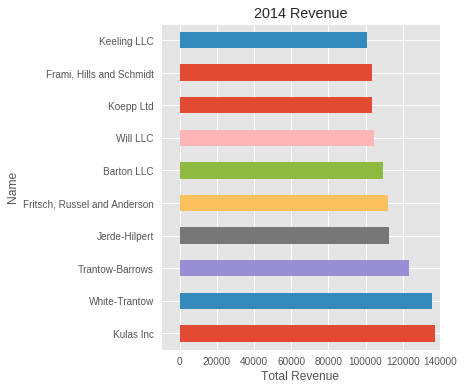

In [16]:
fig, ax = plt.subplots(figsize=(5,6))
top_10.plot(kind='barh',y="Sales",x="Name",ax=ax)
ax.set_xlim([-10000,140000])
ax.set(title='2014 Revenue',xlabel='Total Revenue')
ax.legend().set_visible(False)

There are plenty of things you probably want to do to clean up this plot. One of the biggest eye sores is the formatting of the Total Revenue numbers. Matplotlib can help us with this through the use of the FuncFormatter . This versatile function can apply a user defined function to a value and return a nicely formatted string to place on the axis.

In [0]:
def currency(x, pos):
  'The two args are the value and tick position'
  if x >= 1000000:
    return '${:1.1f}M'.format(x*1e-6)
  return '${:1.0f}K'.format(x*1e-3)

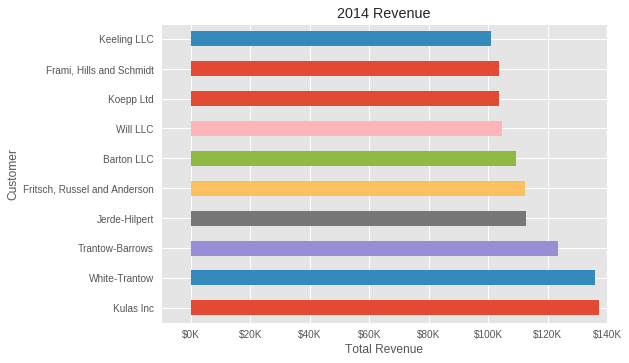

In [19]:
fig, ax = plt.subplots()
top_10.plot(kind='barh',y="Sales",x="Name",ax=ax)
ax.set_xlim([-10000,140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

The final customization feature I will go through is the ability to add annotations to the plot. In order to draw a vertical line, you can use ax.axvline() and to add custom text, you can use ax.text() .

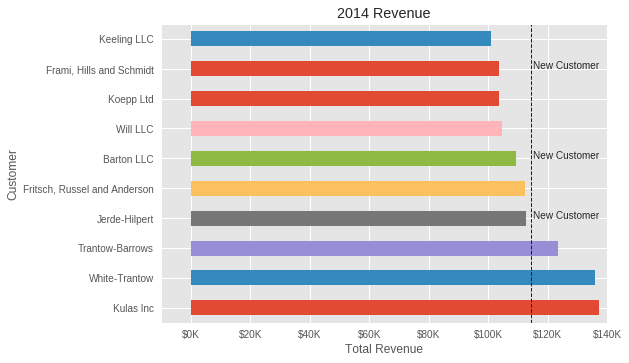

In [20]:
fig, ax = plt.subplots()

# plot the data and get the averaged
top_10.plot(kind='barh',y="Sales",x="Name",ax=ax)
avg = top_10['Sales'].mean()

# set limits and labels
ax.set_xlim([-10000,140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# add a line for the average
ax.axvline(x=avg, color='b',label='Average',linestyle='--',linewidth=1)

# annotate the new customers
for cust in [3,5,8]:
  ax.text(115000, cust, "New Customer")
  
# format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# hide the legend
ax.legend().set_visible(False)

# Figures and Plots

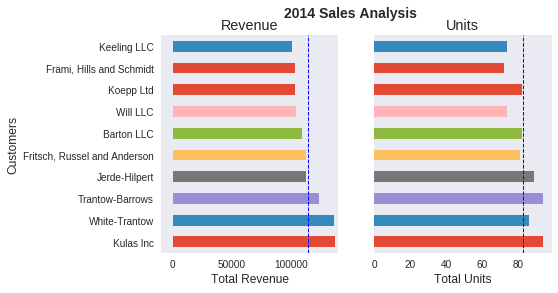

In [27]:
plt.style.use('seaborn-dark')
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,4))
top_10.plot(kind='barh',y="Sales",x="Name",ax=ax0)
ax0.set_xlim([-10000,140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b',label='Average',linestyle='--',linewidth=1)


top_10.plot(kind='barh',y="Purchases",x="Name",ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b',label='Average',linestyle='--',linewidth=1)

fig.suptitle('2014 Sales Analysis',fontsize=14, fontweight='bold')

ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

Matplotlib supports many different formats for saving files. You can use fig.canvas.get_supported_filetypes() to see what your system supports:

In [28]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [0]:
fig.savefig('sales.png',transparent=False,dpi=80,bbox_inches="tight")

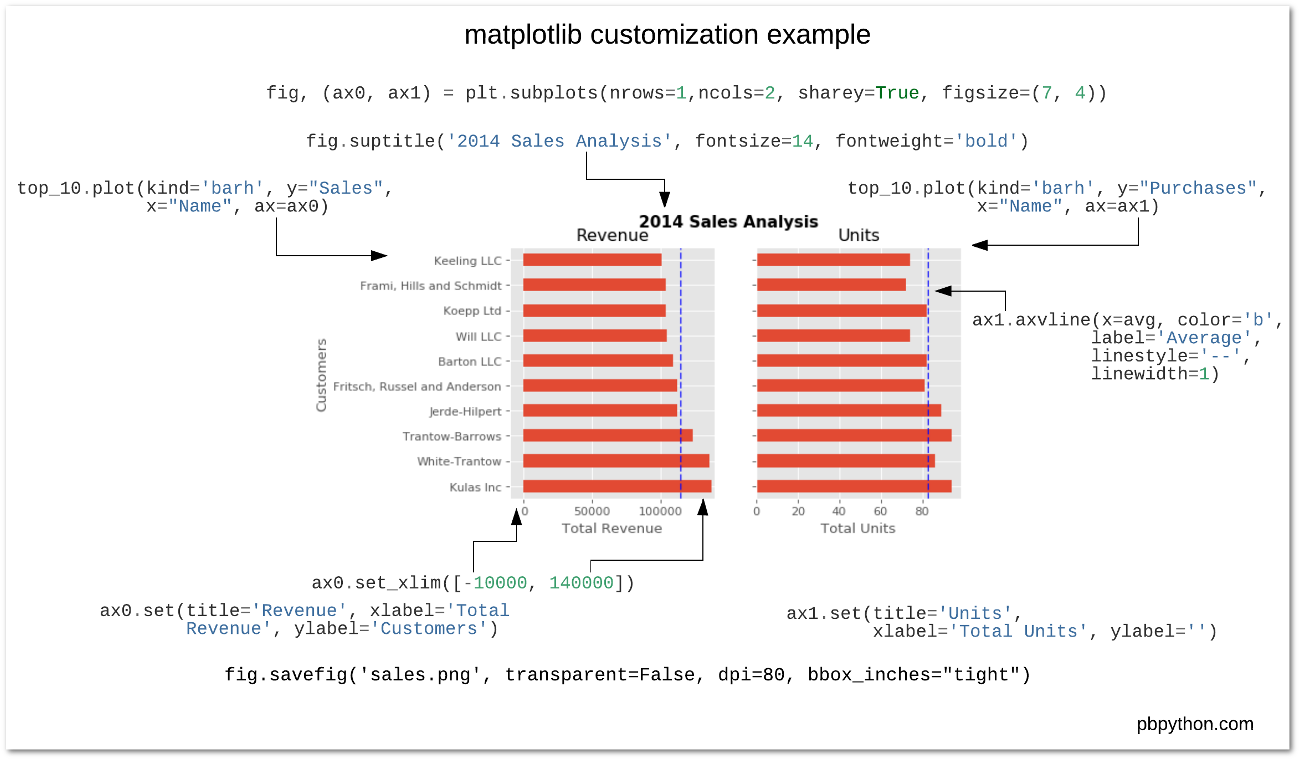

In [33]:
Image('matplotlib-pbpython-example.png')

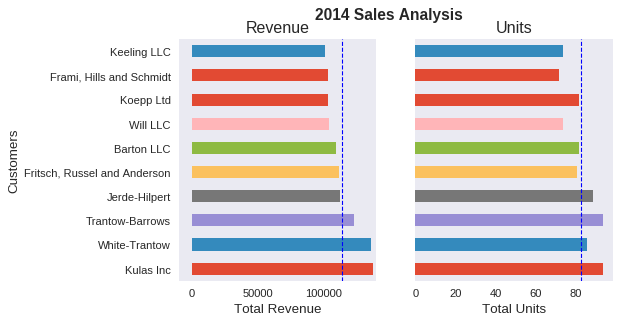

In [34]:
Image('sales.png')